In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
print("Imported Successfully...!")

Imported Successfully...!


In [2]:
df = pd.read_csv(r'mercedes_benz_sales_2020_2025.csv')
df

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes
...,...,...,...,...,...,...,...,...,...
12132661,AMG S 63,2025,Global,Silver,Electric,219647,811,1,Yes
12132662,AMG S 63,2025,Global,Grey,Electric,251632,799,1,Yes
12132663,AMG S 63,2025,Global,Grey,Hybrid,260947,803,1,Yes
12132664,AMG S 63,2025,Global,Grey,Electric,311030,792,1,Yes


In [3]:
df.duplicated().sum()

np.int64(3153)

In [4]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info

<bound method DataFrame.info of              Model  Year  Region   Color Fuel Type  Base Price (USD)  \
0          A-Class  2020  Global  Yellow    Diesel             41265   
1          A-Class  2020  Global   Black    Petrol             51023   
2          A-Class  2020  Global    Grey    Petrol             72819   
3          A-Class  2020  Global   Black    Petrol             62480   
4          A-Class  2020  Global   White    Petrol             35189   
...            ...   ...     ...     ...       ...               ...   
12129508  AMG S 63  2025  Global  Silver  Electric            219647   
12129509  AMG S 63  2025  Global    Grey  Electric            251632   
12129510  AMG S 63  2025  Global    Grey    Hybrid            260947   
12129511  AMG S 63  2025  Global    Grey  Electric            311030   
12129512  AMG S 63  2025  Global  Silver  Electric            383516   

          Horsepower  Sales Volume Turbo  
0                252             1   Yes  
1                

In [7]:
df.isnull().sum()

Model               0
Year                0
Region              0
Color               0
Fuel Type           0
Base Price (USD)    0
Horsepower          0
Sales Volume        0
Turbo               0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(12129513, 9)

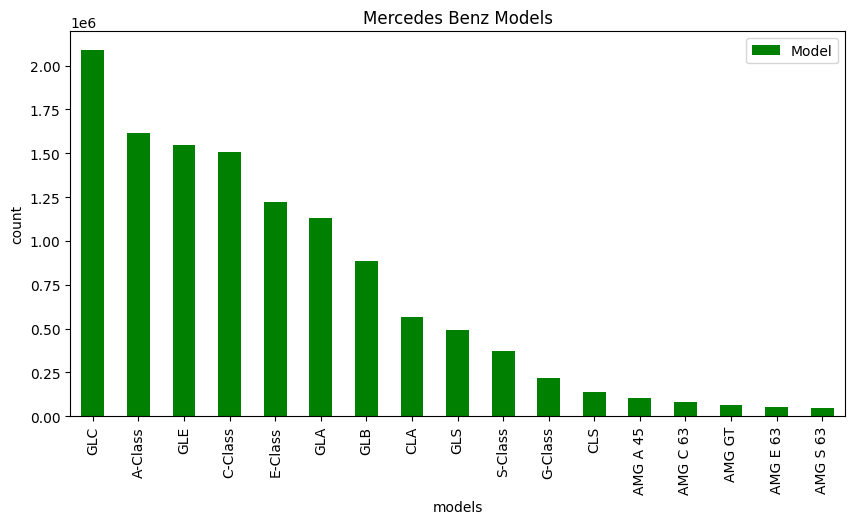

----------------------------------------
Model
GLC         2090446
A-Class     1617611
GLE         1545799
C-Class     1504381
E-Class     1219302
GLA         1128891
GLB          883543
CLA          564621
GLS          493186
S-Class      374550
G-Class      217173
CLS          138612
AMG A 45     103305
AMG C 63      83154
AMG GT        65720
AMG E 63      53724
AMG S 63      45495
Name: count, dtype: int64


In [10]:
#plot the bar graph for model
model = df['Model'].value_counts()
plt.figure(figsize=(10, 5))
model.plot(kind = 'bar', color = 'g', label = 'Model')
plt.title("Mercedes Benz Models")
plt.xlabel('models')
plt.ylabel('count')
plt.legend()
plt.show()
print('--' * 20)
print(model)

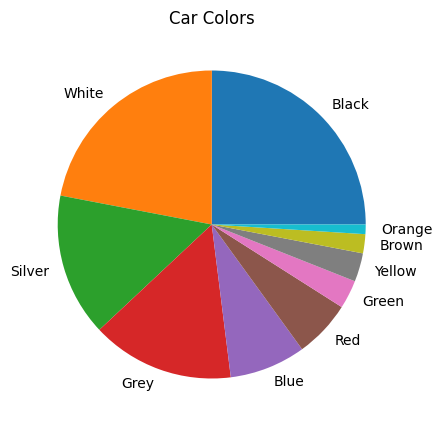

----------------------------------------
Color
Black     3030460
White     2669211
Silver    1819030
Grey      1818707
Blue       970235
Red        729227
Green      364188
Yellow     363907
Brown      242972
Orange     121576
Name: count, dtype: int64


In [11]:
color = df['Color'].value_counts()
plt.figure(figsize=(5, 5))
color.plot(kind='pie')
plt.title('Car Colors')
plt.show()
print("--" * 20)
print(color)

In [12]:
avg_base_price = np.mean(df['Base Price (USD)'])
print(round(avg_base_price))

104223


In [13]:
avg_price = df['Base Price (USD)'].mean()
print(round(avg_price))

104223


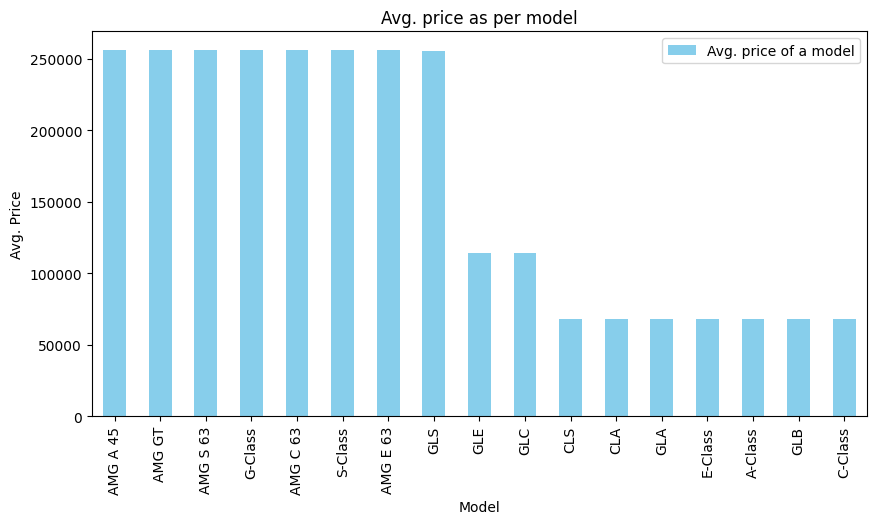

________________________________________
Model
AMG A 45    256529.0
AMG GT      256512.0
AMG S 63    256429.0
G-Class     256374.0
AMG C 63    256337.0
S-Class     256319.0
AMG E 63    256129.0
GLS         255880.0
GLE         114370.0
GLC         114259.0
CLS          68198.0
CLA          68172.0
GLA          68122.0
E-Class      68108.0
A-Class      68094.0
GLB          68083.0
C-Class      68034.0
Name: Base Price (USD), dtype: float64 0


In [14]:
#find the avg base price according to the model
avg_base_price_of_a_model = df.groupby('Model')['Base Price (USD)'].mean().sort_values(ascending = False)
#plot according to the avg price of a model
plt.figure(figsize=(10, 5))
avg_base_price_of_a_model.plot(kind = 'bar', color='skyblue', label = 'Avg. price of a model')
plt.title("Avg. price as per model")
plt.xlabel('Model')
plt.ylabel('Avg. Price')
plt.legend()
plt.show()
print('__' * 20)
print(round(avg_base_price_of_a_model),0)

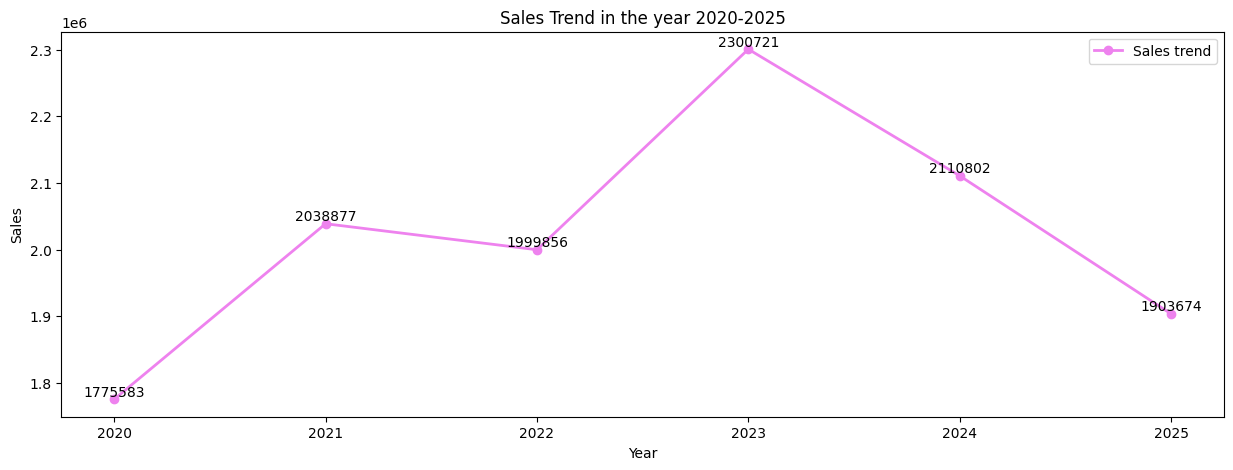

--------------------------------------------------------------------------------
Year
2023    2300721
2024    2110802
2021    2038877
2022    1999856
2025    1903674
2020    1775583
Name: count, dtype: int64


In [15]:
#sales trend in the year 2020-2025
sales_trend = df['Year'].value_counts().sort_index(ascending= True)
plt.figure(figsize=(15, 5))
sales_trend.plot(kind = 'line', lw = 2, marker = 'o', color = 'violet', label = 'Sales trend')
#data_labels = sales_trend.values
for year, sales in sales_trend.items():
    plt.text(year, sales, str(sales), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Sales Trend in the year 2020-2025')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()
print('----' * 20)
sales_trend = sales_trend.sort_values(ascending= False)
print(sales_trend)

In [16]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)',
       'Horsepower', 'Sales Volume', 'Turbo'],
      dtype='str')

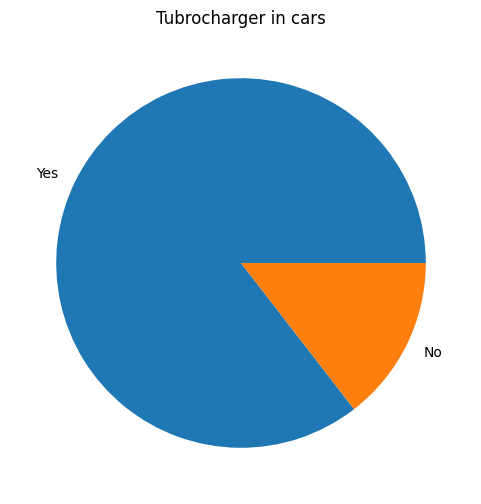

----------------------------------------
Turbo
Yes    10368236
No      1761277
Name: count, dtype: int64


In [17]:
#Turbo 
turbo = df['Turbo'].value_counts()
plt.figure(figsize=(6,6))
turbo.plot(kind = 'pie')
plt.title('Tubrocharger in cars')
plt.show()
print('--' * 20)
print(turbo)

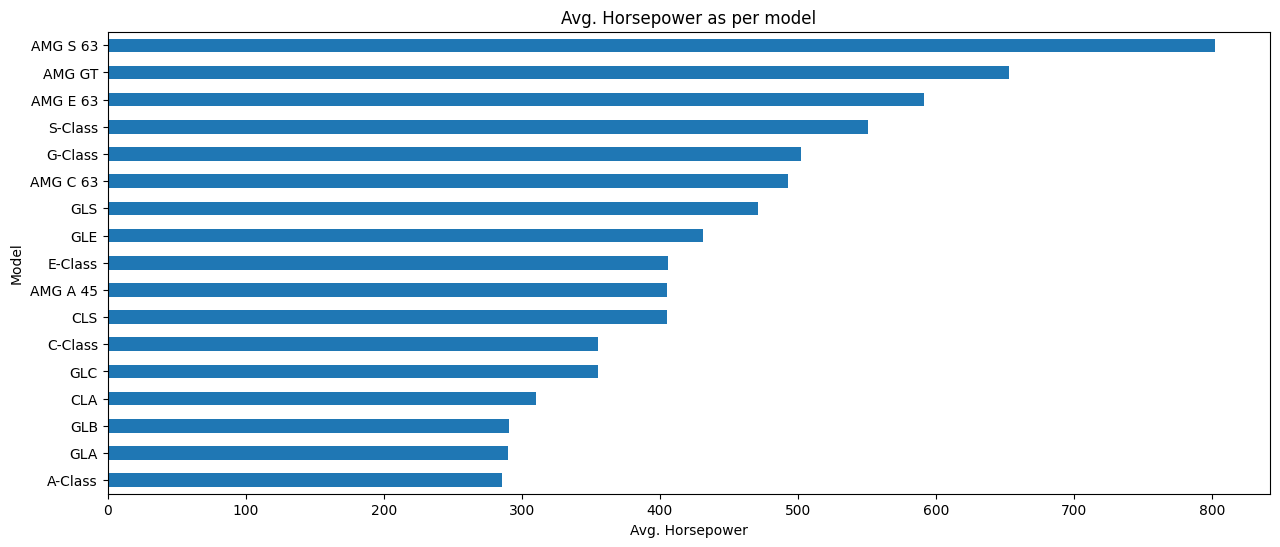

In [38]:
#avg horsepower according to model
avg_horse_power_model = df.groupby('Model')['Horsepower'].mean().sort_values(ascending=True)
plt.figure(figsize=(15, 6))
avg_horse_power_model.plot(kind = 'barh')
plt.title('Avg. Horsepower as per model')
plt.xlabel('Avg. Horsepower')
plt.ylabel('Model')
plt.show()

In [19]:
# revenue
df['Revenue'] = df['Base Price (USD)'] * df['Sales Volume']

In [20]:
#from matplotlib.pyplot import title
rev_model = df.groupby('Model')['Revenue'].sum().sort_values(ascending= False)

fig = px.bar(x = rev_model.index, y = rev_model.values, title = 'Revenue by model', 
labels = {'x': 'Model', 'y': 'Revenue'})

fig.show()

In [21]:
#Revenue vs Sales Volume
rev_model = df.groupby('Model').agg({
    'Revenue' : 'sum',
    'Sales Volume' : 'sum'
}).reset_index()

fig = px.scatter(
    rev_model,
    x = 'Sales Volume',
    y = 'Revenue',
    color = 'Model',
    size = 'Sales Volume',
    size_max = 60,
    title = 'Revenue vs Sales Volume',
    labels = {'Sales Volume' : 'Total Units Sold', 'Revenue' : 'Total Revenue ($)'}
)
fig.update_layout(
    width = 1000,
    height = 550
)
fig.show()

In [22]:
#Fuel Type Trend
fuel_trend = df.groupby(['Year', 'Fuel Type'])['Sales Volume'].sum().reset_index()

fig = px.line(fuel_trend,
              x = 'Year', 
              y = 'Sales Volume',
              markers = 'o',
              color = 'Fuel Type',
              title= 'Fuel Type Sales trend (2020 - 2025)'
)
fig.show()

In [23]:
# Color vs Price & Sales
color_price = df.groupby('Color')['Base Price (USD)'].mean().reset_index()

fig = px.bar(
    color_price,
    x = 'Color',
    y = 'Base Price (USD)',
    title = 'Avg. Price by Color'
)
fig.show()

print('---' * 20)
print(round(color_price))

------------------------------------------------------------
    Color  Base Price (USD)
0   Black          104218.0
1    Blue          104133.0
2   Brown          104423.0
3   Green          104258.0
4    Grey          104166.0
5  Orange          104125.0
6     Red          104290.0
7  Silver          104262.0
8   White          104212.0
9  Yellow          104390.0


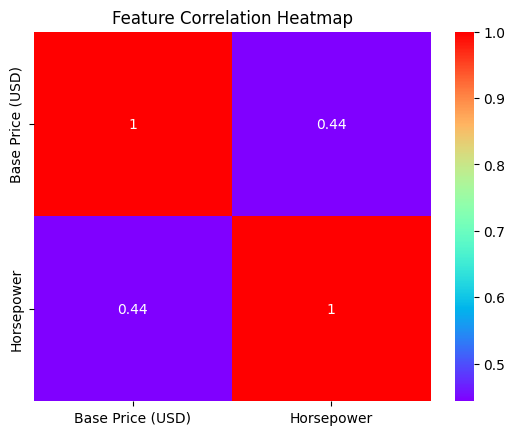

In [24]:
#Correlation Analysis
sns.heatmap(df[['Base Price (USD)', 'Horsepower']].corr(), annot = True, cmap= 'rainbow')
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
from numpy import append
#Revenue by Year & Model
year_model_rev = (df.groupby(['Year', 'Model'])['Revenue'].sum().reset_index())

In [26]:
year_model_rev = (
    df.groupby(['Year', 'Model'])['Revenue']
      .sum()
      .reset_index()
)

years = sorted(year_model_rev['Year'].unique())
models = year_model_rev['Model'].unique()

fig = go.Figure()

kpi_data = []

for year in years:
    yearly_data = df[df['Year'] == year]
    total_revenue = yearly_data['Revenue'].sum()
    total_sales = yearly_data['Sales Volume'].sum()
    top_model = yearly_data.groupby('Model')['Revenue'].sum().idxmax()

    kpi_data.append({
        "year": year,
        "revenue": total_revenue,
        "sales": total_sales,
        "top_model": top_model
    })

    temp = year_model_rev[year_model_rev['Year'] == year]

    fig.add_trace(go.Bar(
        x=temp['Model'],
        y=temp['Revenue'],
        name=str(year),
        visible=False
    ))

# Show first year by default
fig.data[0].visible = True


buttons = []

for i, year in enumerate(years):
    yr_data = kpi_data[i]
    visibility = [False] * len(years)
    visibility[i] = True

    buttons.append(dict(
        label=str(year),
        method="update",
        args=[
            {"visible": visibility},
            {"title": f"""
Revenue by Model - {year}<br>
<b>Total Revenue:</b> ${yr_data['revenue']:,.0f} |
<b>Total Sales:</b> {yr_data['sales']:,} units |
<b>Top Model:</b> {yr_data['top_model']}
"""}
        ]
    ))
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=1.15,
        y=1.15
    )],
    title=f"Revenue by Model - {years[0]}",
    yaxis_title="Revenue (USD)",
    xaxis_title="Model"
)

fig.show()

In [27]:
sales_year_model = (
    df.groupby(['Year', 'Model'])['Sales Volume'].sum().reset_index()
)
years = sorted(sales_year_model['Year'].unique())
models = sales_year_model['Model'].unique()

In [28]:
from plotly.graph_objs.layout import yaxis
from turtle import width
from plotly.subplots import make_subplots
import math

n_years = len(years)
cols = 3
rows = math.ceil(n_years / cols)

fig = make_subplots(
    rows = rows,
    cols=cols,
    subplot_titles=[f'Sales by model - {year}' for year in years]
)
row = 1
col = 1

for year in years:
    temp = sales_year_model[sales_year_model['Year'] == year]
    fig.add_trace(
        go.Bar(
            x = temp['Model'],
            y = temp['Sales Volume'],
            name = str(year),
            showlegend = False
        ),
        row = row,
        col = col
    )

    col += 1
    if col > cols:
        col = 1
        row += 1

fig.update_layout(
    height = 350 * rows,
    width = 1100,
    title_text = 'Model-wise sales per year 2020 - 2025',
    yaxis_title = 'Sales Volume',
    xaxis_title = 'Model'
)
fig.show()